In [1]:
from PIL import Image

for i in range(1, 414):
    num = str(i).zfill(3)
    im = Image.open(f"1. Original Images/a. Training Set/IDriD_{num}.jpg")
    resized_image = im.resize((512, 512))
    resized_image.save(f"resized/a_training/IDriD_{num}.jpg")

In [2]:
from PIL import Image

for i in range(1, 104):
    num = str(i).zfill(3)
    im = Image.open(f"1. Original Images/b. Testing Set/IDriD_{num}.jpg")
    resized_image = im.resize((512, 512))
    num2 = 413 + i
    resized_image.save(f"resized/b_testing/IDriD_{num2}.jpg")

In [3]:
# import pandas as pd
#
# training = pd.read_csv("2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv")
# testing = pd.read_csv("2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv")

In [ ]:
# Change image names
# testing["Image name"] = testing["Image name"].apply(
#    lambda x: "IDRiD_" + str(int(x.split("_")[1]) + 413).zfill(3)
# )
# testing["split_type"] = "testing"
#
# training = training[["Image name", "Retinopathy grade", "Risk of macular edema "]]
# training["split_type"] = "training"

In [48]:
# combined = pd.concat([training, testing], ignore_index=True)
# combined.to_csv("resized/test_split_image_key.csv")

### Recode retinopathy grade to match mesidor

In [1]:
import pandas as pd
import numpy as np

recat = pd.read_csv("resized/test_split_image_key.csv")

Index(['Unnamed: 0', 'Image name', 'Retinopathy grade',
       'Risk of macular edema ', 'split_type'],
      dtype='object')

In [2]:
recat = recat[
    ["Image name", "Retinopathy grade", "Risk of macular edema ", "split_type"]
]

In [3]:
recat["Retinopathy grade new"] = recat["Retinopathy grade"].map(
    {0: 0, 1: 1, 2: 2, 3: 2, 4: 3}
)

### Train test split

In [4]:
recat["split"] = "train"


def assign_test_indices(group):
    test_indices = np.random.choice(group.index, size=min(6, len(group)), replace=False)
    group.loc[test_indices, "split"] = "test"
    return group


recat = recat.groupby("Retinopathy grade new").apply(assign_test_indices)

recat = recat.sample(frac=1).reset_index(drop=True)

In [10]:
counts_split = recat.groupby(["Retinopathy grade new", "split"]).size()
counts_split

Retinopathy grade new  split
0                      test       6
                       train    162
1                      test       6
                       train     19
2                      test       6
                       train    255
3                      test       6
                       train     56
dtype: int64

In [8]:
recat2 = recat[
    ["Image name", "Risk of macular edema ", "Retinopathy grade new", "split"]
]

### Visualize train and test data

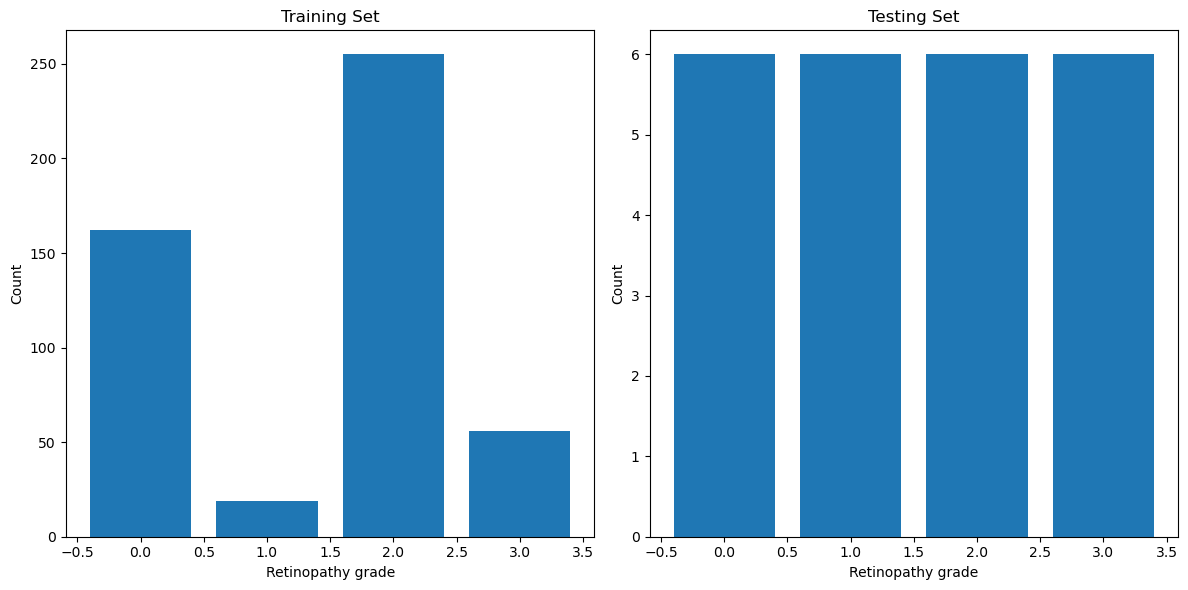

In [18]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

training = recat2[recat2["split"] == "train"]
testing = recat2[recat2["split"] == "test"]

grade_counts_train = training["Retinopathy grade new"].value_counts().sort_index()
grade_counts_test = testing["Retinopathy grade new"].value_counts().sort_index()

ax1.bar(grade_counts_train.index, grade_counts_train.values)
ax1.set_xlabel("Retinopathy grade")
ax1.set_ylabel("Count")
ax1.set_title("Training Set")

ax2.bar(grade_counts_test.index, grade_counts_test.values)
ax2.set_xlabel("Retinopathy grade")
ax2.set_ylabel("Count")
ax2.set_title("Testing Set")

plt.tight_layout()

plt.show()

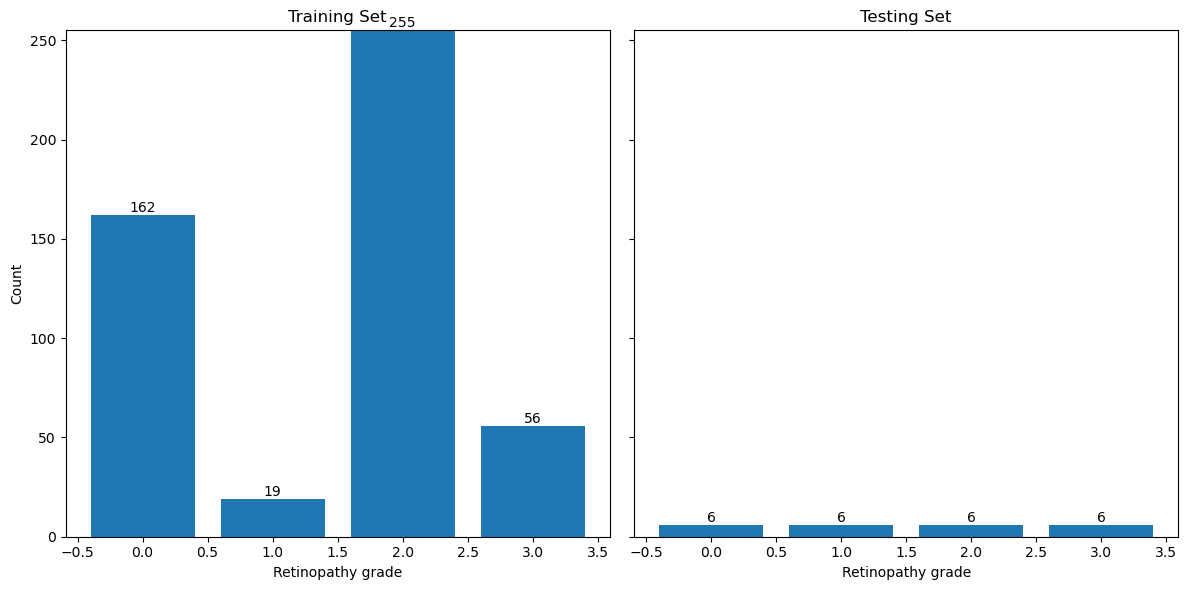

In [19]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

bars_train = ax1.bar(grade_counts_train.index, grade_counts_train.values)

ax1.set_xlabel("Retinopathy grade")
ax1.set_ylabel("Count")
ax1.set_title("Training Set")
for bar in bars_train:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2, height, height, ha="center", va="bottom"
    )

bars_test = ax2.bar(grade_counts_test.index, grade_counts_test.values)
ax2.set_xlabel("Retinopathy grade")
ax2.set_title("Testing Set")
for bar in bars_test:
    height = bar.get_height()
    ax2.text(
        bar.get_x() + bar.get_width() / 2, height, height, ha="center", va="bottom"
    )

max_y = max(max(grade_counts_train.values), max(grade_counts_test.values))
ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

plt.tight_layout()

plt.show()

In [9]:
recat.to_csv("resized/train_split_key_transformation.csv")
recat2.to_csv("resized/train_split_key_recoded.csv")

### Save images in new folders

In [ ]:
import os
import pandas as pd
import shutil

train_folder = "resized/train"
test_folder = "resized/test"

# Iterate through the dataframe and move files accordingly
for index, row in recat2.iterrows():
    image_name = row["Image name"]
    split = row["split"]
    source_path = os.path.join("resized/all_512", image_name + ".jpg")
    if split == "train":
        destination_folder = train_folder
    else:
        destination_folder = test_folder

    destination_path = os.path.join(destination_folder, image_name + ".jpg")